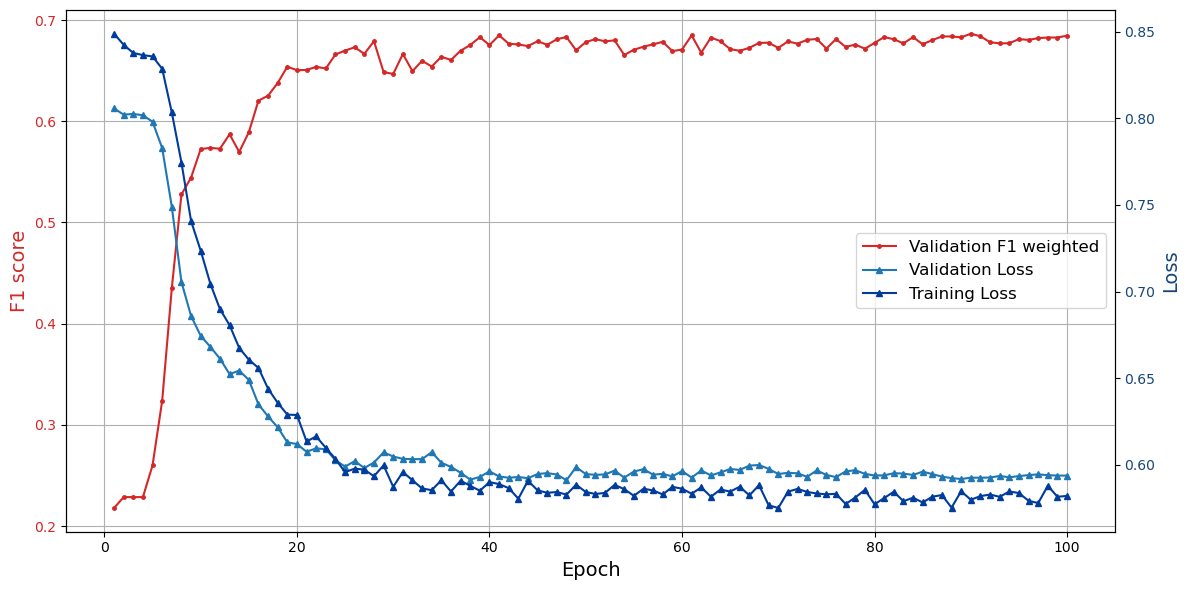

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('metrics/roberta-large_kfold_summary_metrics.csv')

#filter out the records where metric_type is not 'averaged_per_epoch'
df = df[df['metric_type'] == 'averaged_per_epoch']

# Set the style
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot F1 weighted and Accuracy on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Epoch', fontsize=14)
ax1.set_ylabel('F1 score', color=color, fontsize=14)
ax1.plot(df['epoch'], df['avg_eval_f1_weighted'], color=color, linestyle='-', marker='.', markersize=5, label='Validation F1 weighted')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a second y-axis for the loss
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Loss', color="#164679", fontsize=14)  # we already handled the x-label with ax1
ax2.plot(df['epoch'], df['avg_eval_loss'], color=color, linestyle='-', marker='^', markersize=5, label='Validation Loss')
ax2.plot(df['epoch'], df['avg_train_loss'], color="#003C9C", linestyle='-', marker='^', markersize=5, label='Training Loss')
ax2.tick_params(axis='y', labelcolor="#164679")


# Add legends
# To combine legends from both axes, we get handles and labels from both and pass them to a single legend command
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right', fontsize=12)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("warmup100_ZERO_softf1.pdf") # Save the plot as a PDF
plt.show()
